In [1]:
import tweepy

with open("D:/github/twitter.txt", encoding="utf8") as f:
    client = tweepy.Client(f.readline().strip())

In [2]:
keyword = "공부"
raw_data = tweepy.Paginator(client.search_recent_tweets, keyword, tweet_fields=["created_at"], max_results=100, limit=30).flatten()
tweet_data = list(map(dict, raw_data))
print(len(tweet_data))

2991


In [3]:
korean_stopwords_path = "../../../projects/webcrawling/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = set(map(lambda x:x.strip(), f.readlines()))

In [6]:
from apyori import apriori
from konlpy.tag import Okt
import re

not_hangul = re.compile("[^가-힣]")
raw_tweet_nouns = list(map(lambda x:Okt().nouns(not_hangul.sub(" ", x["text"])),tweet_data))
filtered_tweet_nouns = [[noun for noun in nouns if len(noun)>1 and noun not in stopwords] for nouns in raw_tweet_nouns]
transactions = filtered_tweet_nouns
print("total nouns num:", len(set([noun for nouns in filtered_tweet_nouns for noun in nouns])))
print("total nouns for min_support:", len(list(apriori(transactions, min_support=0.02, max_length=1))))
results = list(apriori(transactions, min_support=0.02, max_length=2, min_lift=1.5))
print("total relation for min_lift:", len(results))
for result in results: # result is named tuple
    print(result.items, result.ordered_statistics[-1].lift)

total nouns num: 2539
total nouns for min_support: 33
total relation for min_lift: 172
frozenset({'능력', '공상'}) 29.613861386138616
frozenset({'다가', '공상'}) 43.98529411764706
frozenset({'도서관', '공상'}) 39.88
frozenset({'공상', '독서'}) 18.693749999999998
frozenset({'문제', '공상'}) 36.925925925925924
frozenset({'부족', '공상'}) 46.01538461538461
frozenset({'생각', '공상'}) 22.65909090909091
frozenset({'생산', '공상'}) 46.01538461538461
frozenset({'스스로', '공상'}) 43.98529411764706
frozenset({'시대', '공상'}) 46.01538461538461
frozenset({'오늘날', '공상'}) 46.734375
frozenset({'자기계발', '공상'}) 46.01538461538461
frozenset({'정보', '공상'}) 43.98529411764706
frozenset({'창작', '공상'}) 46.734375
frozenset({'기미가요', '관련'}) 2.651553730950714
frozenset({'관련', '상징'}) 2.66340160284951
frozenset({'관련', '애임'}) 2.66340160284951
frozenset({'역사', '관련'}) 2.635142699901505
frozenset({'관련', '유즈루'}) 2.658649771265479
frozenset({'일제강점기', '관련'}) 2.661023565704109
frozenset({'제발', '관련'}) 2.651553730950714
frozenset({'지금', '관련'}) 2.555789416875793
froze

['공부', '공상', '관련', '기미가요', '능력', '다가', '도서관', '독서', '문제', '부족', '사람', '상징', '생각', '생산', '스스로', '시대', '애임', '엄마', '역사', '오늘날', '요즘', '운동', '유즈루', '일제강점기', '자기계발', '정보', '제발', '지금', '진짜', '창작', '한국', '할머니', '할아버지']
{'공부': array([ 0.5759216, -0.884813 ]), '공상': array([-0.00629546,  0.69726838]), '관련': array([-0.313579  , -0.43739812]), '기미가요': array([ 0.08297066, -0.76380443]), '능력': array([0.13831478, 0.64382551]), '다가': array([0.00736093, 0.59175334]), '도서관': array([-0.0228975 ,  0.52391282]), '독서': array([0.07909481, 0.41432638]), '문제': array([-0.1137751 ,  0.67056734]), '부족': array([-0.11688694,  0.61647388]), '사람': array([ 0.04705394, -1.        ]), '상징': array([-0.43866275, -0.53963564]), '생각': array([-0.1651648 ,  0.72804005]), '생산': array([-0.05656121,  0.72917296]), '스스로': array([0.0736223 , 0.69165602]), '시대': array([-0.08886275,  0.54361277]), '애임': array([0.08483038, 0.01879528]), '엄마': array([ 0.83167283, -0.13300244]), '역사': array([-0.18924976, -0.89123312]), '오늘날': array([0

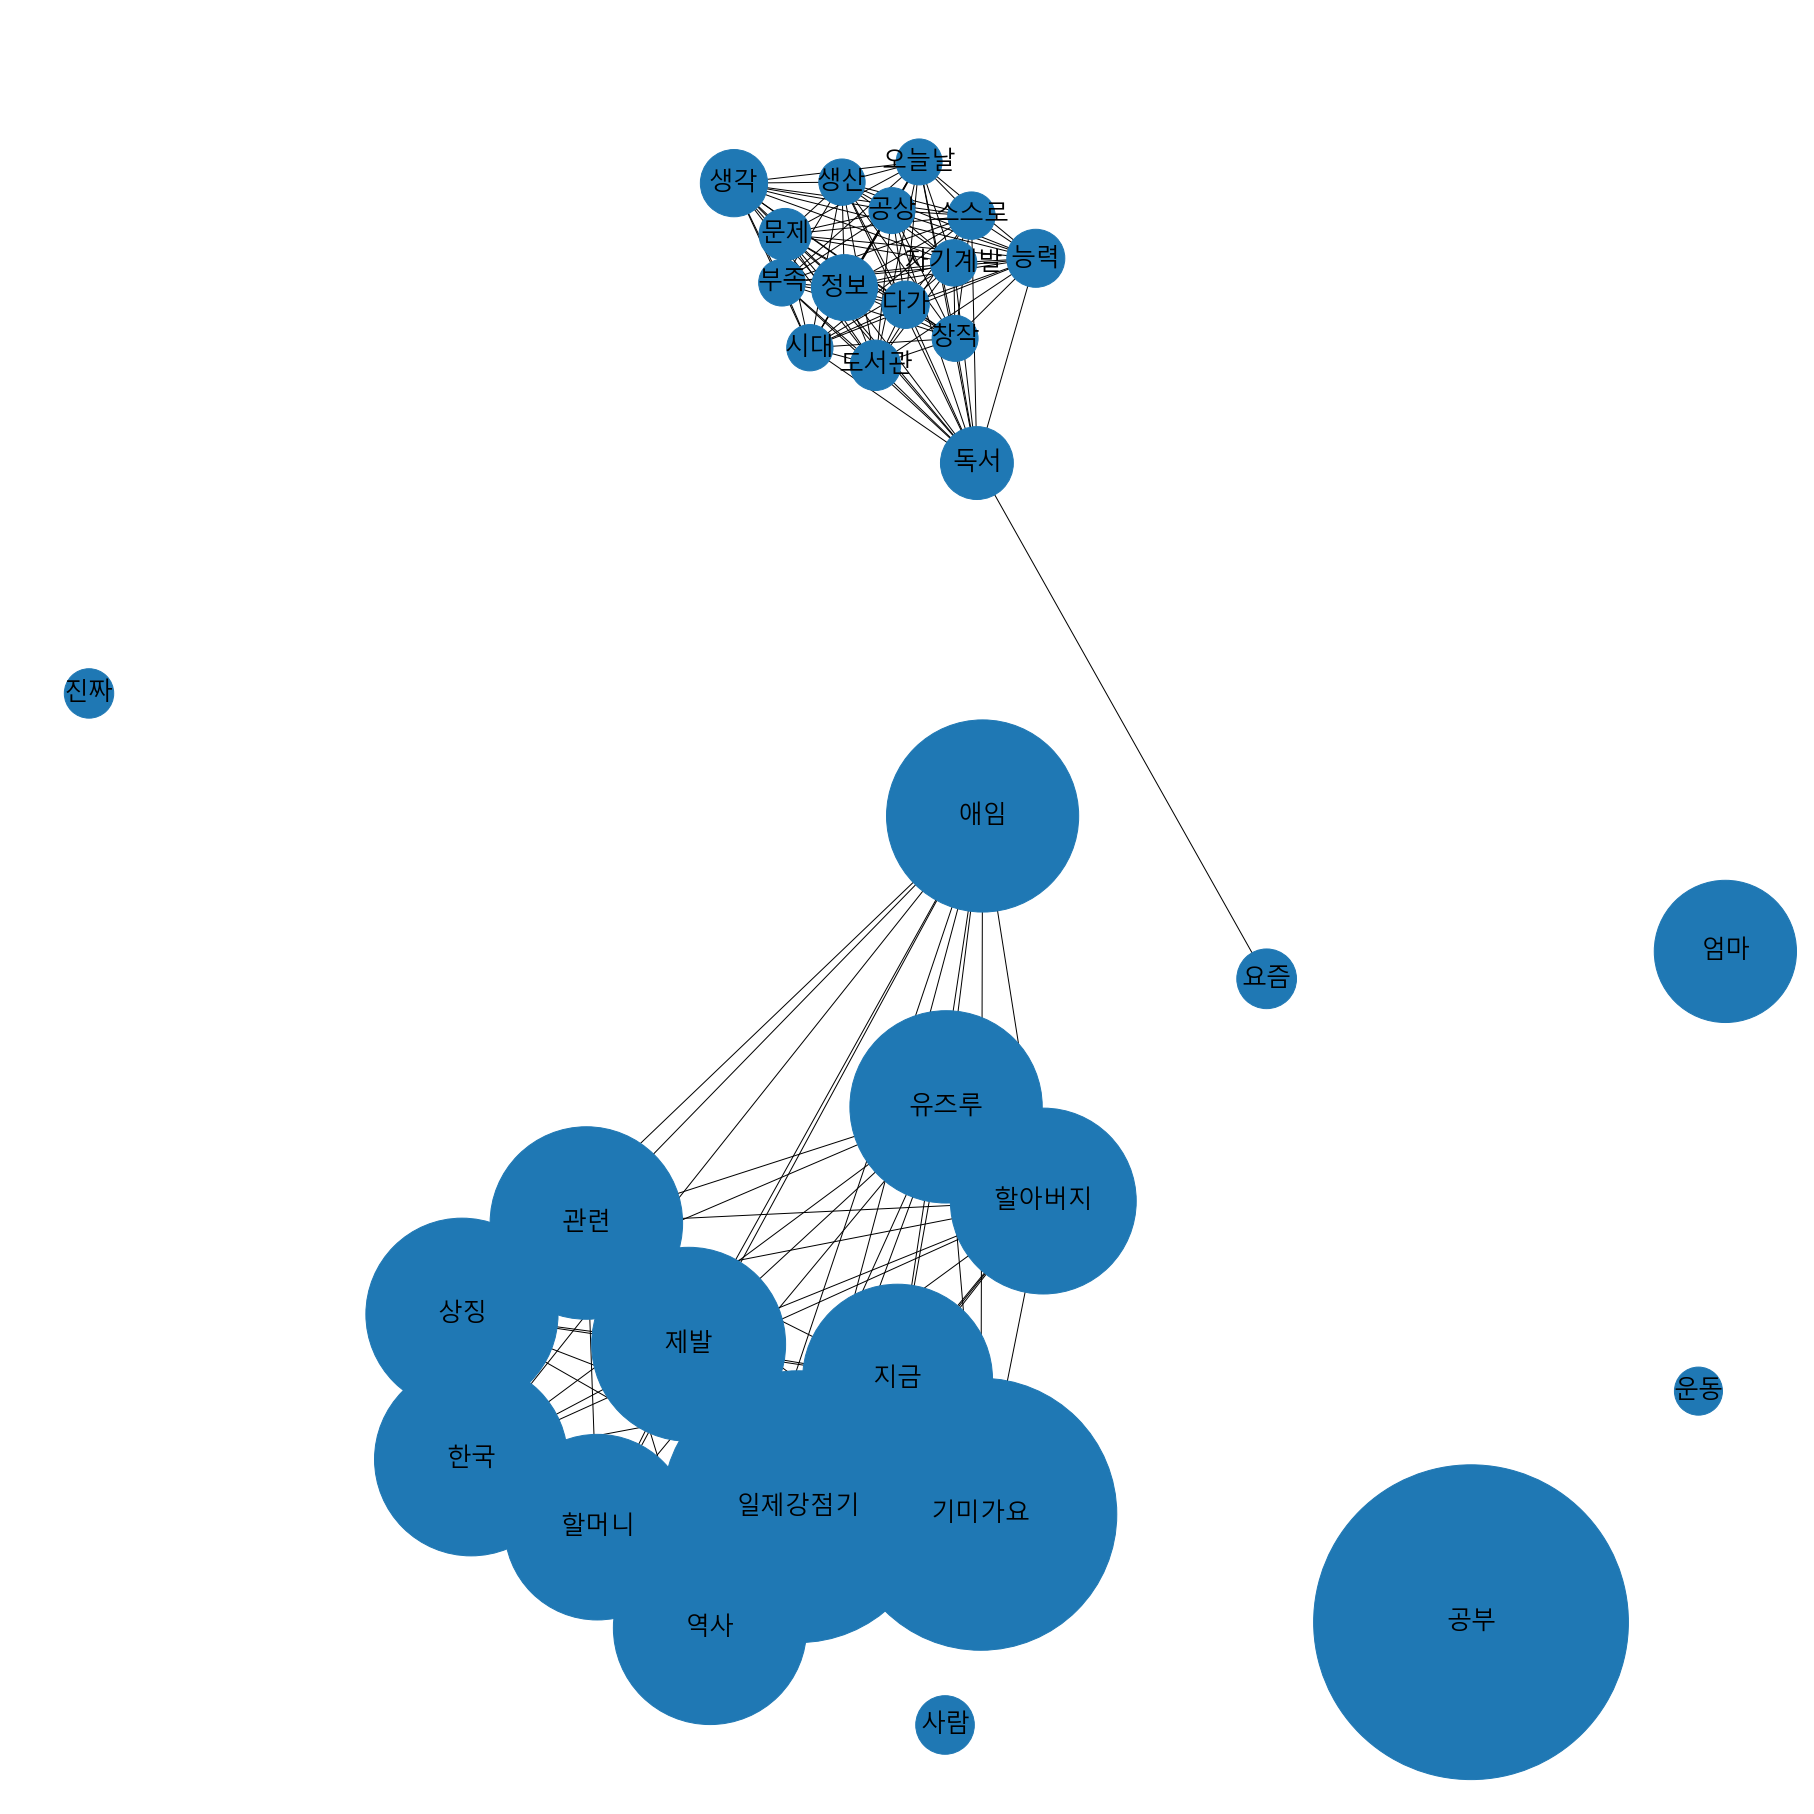

In [7]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
G = nx.Graph()
node_counter = Counter([noun for nouns in filtered_tweet_nouns for noun in nouns])

# get all nouns that's support is more than 0.02
for result in list(apriori(transactions, min_support=0.02, max_length=1)):
    G.add_node(*result.items)
print(G.nodes)
G.add_weighted_edges_from([(*result.items, result.ordered_statistics[-1].lift/len(G.nodes)**2) for result in results])
pos = nx.spring_layout(G)
print(pos)
sizes = list(map(lambda x:node_counter[x]*len(G.nodes), G.nodes))
print(sizes)
nx.draw(G, pos=pos, node_size=sizes)
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)
ax = plt.gca()
plt.show()